In [8]:
#https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/ 
# Importing required libraries 
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 

In [9]:
# Read the dataset 
tem = pd.read_csv('../../Datos/LQI/20m/raw_data_run1--28.csv', 
                       index_col ='Date', 
                       parse_dates = True) 
  

cantidad=len(tem)
print(cantidad)

8064


In [10]:
# Print the first ten rows of the dataset 
tem.head(10) 

,LQI
Date,
1,1
2,104
3,108
4,1
5,1
6,97
7,101
8,103
9,1


<AxesSubplot:xlabel='Date'>

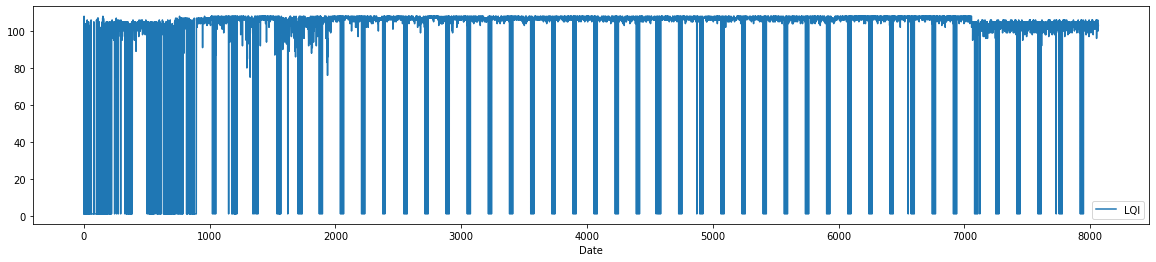

In [11]:
tem.plot(figsize=(20,4))

In [5]:
# Import the library 
#from pmdarima import auto_arima 
  
# Ignore harmless warnings 
#import warnings 
#warnings.filterwarnings("ignore") 
  
# Fit auto_arima function 
#stepwise_fit = auto_arima(tem['LQI'], start_p = 2, start_q = 2, 
 #                         max_p = 3, max_q = 3, m = 12, 
  #                        start_P = 0, seasonal = True, 
   #                       d = None, D = 1, trace = True, 
    #                      error_action ='ignore',   # we don't want to know if an order does not work 
     #                     suppress_warnings = True,  # we don't want convergence warnings 
      #                    stepwise = True)           # set to stepwise 
  
# To print the summary 
#stepwise_fit.summary() 

In [12]:
#ARIMA(0,0,2)(1,1,2)[12] intercept   : AIC=36338.901, Time=97.88 sec is the best

# Split data into train / test sets 
#Hallar el 75% y el 25%
entrenamiento = int((cantidad/100)*75)
testing = int((cantidad/100)*25)
print(entrenamiento, testing)

6048 2016


In [13]:
train = tem.iloc[:entrenamiento] 
test = tem.iloc[entrenamiento-1:] 
  
# Fit a SARIMAX(0, 0, 2)x(1, 1, 2, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['LQI'],  
                order = (0, 0, 2),  
                seasonal_order =(1, 1, 2, 12)) 
  
result = model.fit() 
result.summary() 

C:\Users\ACER\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ACER\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ACER\miniconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                LQI   No. Observations:                 6048
Model:             SARIMAX(0, 0, 2)x(1, 1, 2, 12)   Log Likelihood              -27475.753
Date:                            Thu, 16 Sep 2021   AIC                          54963.505
Time:                                    14:47:51   BIC                          55003.738
Sample:                                         0   HQIC                         54977.473
                                           - 6048                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1705      0.008     21.615      0.000       0.155       0.186
ma.L2          0.1512      0.008     19.099      0.000       0.136       0.167
ar.S.L12      -0.9999      0.000  -2399.714      0.000      -1.001      -0.999
ma.S.L12       0.0729      0.009      7.713      0.000       0.054       0.091
ma.S.L24      -0.9222      0.008   -113.195      0.000      -0.938      -0.906
sigma2       521.4657      5.402     96.538      0.000     510.879     532.053
===================================================================================
Ljung-Box (Q):                     3081.99   Jarque-Bera (JB):             16528.96
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                            -1.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\ACER\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='Date'>

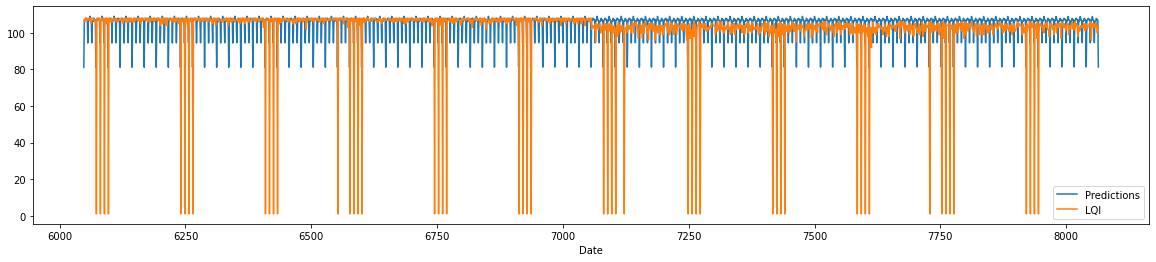

In [14]:
start = len(train) 
end = len(train) + len(test) - 1
  

predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True, figsize=(20,4)) 
test['LQI'].plot(legend = True)

In [15]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
    
# Calculate mean squared error 
mse = mean_squared_error(test["LQI"], predictions)
print("MSE: ")
print(mse)

# Calculate root mean squared error 
rmse = rmse(test["LQI"], predictions)
print("\nRMSE: ")
print(rmse)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape =  mean_absolute_percentage_error(test["LQI"], predictions)
print("\nMAPE (Porcentaje): ")
print(mape)

MSE: 
326.8803846094054

RMSE: 
18.079833644406282

MAPE (Porcentaje): 
270.4709062987928


C:\Users\ACER\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ACER\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ACER\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='Date'>

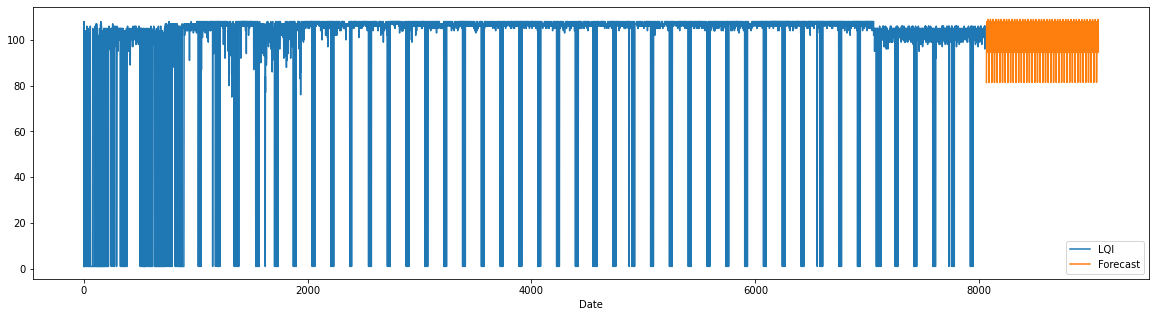

In [16]:
##############################################################################################
#SI QUIERO PREDECIR
# Train the model on the full dataset 
model = model = SARIMAX(tem['LQI'],  
                        order = (0, 0, 2),  
                        seasonal_order =(1, 1, 2, 12)) 

  
# Forecast for the next 3 years 
forecast = result.predict(start = end,  
                          end = end+1000,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
tem['LQI'].plot(figsize = (20, 5), legend = True) 
forecast.plot(legend = True) 